## Heirachacal Clustering
- Clustering - K-means
### K-Means
- You take your dataset
- You choose random CENTROIDS (centres of clusters) 
- You calculate the distance of the feature sets to the centroids
- Then the NEW centroids are calculated based on the mean
- Repeat the process UNTIL the centroids are no longer moving


In [56]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

In [57]:
## Temp Data

In [58]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])
plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()

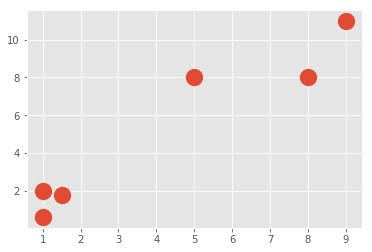

In [59]:
plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()

In [5]:
clf = KMeans(n_clusters = 2)

In [6]:
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [10]:
# labels think of this as lower case y

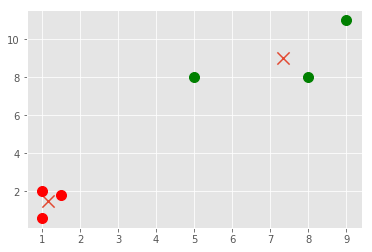

In [80]:
colors = ["g.","r.","b.","k."]*10
for i in range(len(X)):
    # plot each data point - each color based on the LABELS of 1 or 0 since cluster
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize = 20)

plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s=150, linewidths = 5)
plt.show()

In [32]:
titanic = pd.read_excel('titanic.xls')

In [33]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [38]:
#titanic.drop(['body', 'name'], 1, inplace=True)
#titanic.convert_objects(convert_numeric=True)
titanic.fillna(0,inplace=True)


In [39]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [42]:
# THIS IS INSANE MAPPING - USE FOR FUTURE

def handle_non_numeric_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            #if not number, take all the columns and put in list
            column_contents = df[column].values.tolist()
            #make whole list a SET to get uniques
            unique_elements = set(column_contents)
            x = 0
            #populate the values of the dictionary
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
                    # THIS MAPS THE VALUES TO THE COLUMNS!
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

df = handle_non_numeric_data(titanic)

titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,782,211.3375,6,1,2,53
1,1,1,1,0.9167,1,2,527,151.5500,5,1,25,12
2,1,0,0,2.0000,1,2,527,151.5500,5,1,0,12
3,1,0,1,30.0000,1,2,527,151.5500,5,1,0,12
4,1,0,0,25.0000,1,2,527,151.5500,5,1,0,12


In [48]:
X = np.array(titanic.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(titanic['survived'])

In [54]:
titanic.drop(['boat'], 1, inplace=True)

clf = KMeans(n_clusters=2)

clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
correct = 0
for i in range(len(X)):
    # THIS IS NOT IN SUPERVISED
    # REMEMBER THAT 0.3, could b 0.7 and flipped around 
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
    #labels = clf.labels_

print(correct/len(X))

0.7043544690603514


# Doing it manually

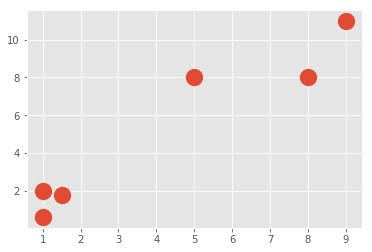

In [81]:
colors = 10*["g","r","c","b","k"]
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])
plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()



In [85]:


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        
        self.centroids = {}
        
        # just allocate and pick first two centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
    
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
            for featureset in data:
                # Creating a list - which populates K values (self centroid only has the amount of k is in it)
                # 0th index in list -> will be distance from 0th centroid, 1st index will be distance from 1st centroid
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            # for comparison
            prev_centroids = dict(self.centroids)
                
            for classification in self.classifications:
                
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    
            if optimized:
                break
            
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


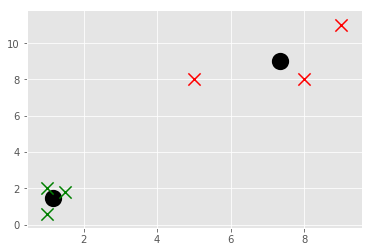

In [88]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

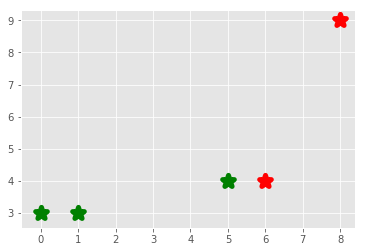

In [89]:
# Testing it out

unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

# Mean SHIFT
- Every data point has a bandwith around it, which is a circle 
- basically every point is a cluster
- The RADIUS bandwith - every single cluster has one of these
- Say you ave 3 points, inside its radius bandwith - you find the mean, then you reset and use that one, and find a new RADIUS BANDWITH. 
- Once the same cluster point does not move anymore under these stages, it is Optimized


[[  4.9295036    5.42218656   4.86620656]
 [  2.97390111  10.41593324  10.21437452]
 [  1.26231344   1.00867005   0.87917637]]
Number of estimated clusters: 3


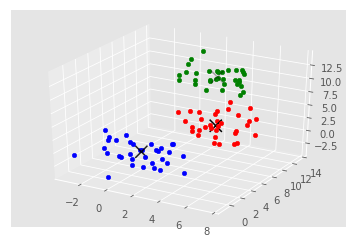

In [91]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()